In [246]:
import pandas as pd
data = pd.read_csv('dataset/cleaned_boston_housing_dataset.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2789 entries, 1 to 4738
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         2789 non-null   int64  
 1   city          2789 non-null   int64  
 2   neighborhood  2789 non-null   int64  
 3   street        2789 non-null   int64  
 4   price         2789 non-null   float64
 5   area          2789 non-null   float64
 6   rooms         2789 non-null   float64
 7   bathrooms     2789 non-null   float64
 8   garage        2789 non-null   float64
 9   number        2789 non-null   float64
 10  done          2789 non-null   int64  
 11  furnished     2789 non-null   int64  
 12  type          2789 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 305.0 KB


In [3]:
data.dropna(inplace=True)

In [158]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)
y = data['price']
print(y)

1        187000.0
2        999000.0
3        640000.0
4        750000.0
6       1400000.0
          ...    
4732     499000.0
4733     600000.0
4734     260000.0
4737     940000.0
4738     250000.0
Name: price, Length: 2789, dtype: float64


In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [160]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'state'}>,
        <Axes: title={'center': 'city'}>,
        <Axes: title={'center': 'neighborhood'}>,
        <Axes: title={'center': 'street'}>],
       [<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'garage'}>],
       [<Axes: title={'center': 'number'}>,
        <Axes: title={'center': 'done'}>,
        <Axes: title={'center': 'furnished'}>,
        <Axes: title={'center': 'type'}>],
       [<Axes: title={'center': 'price_per_square_meter'}>,
        <Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

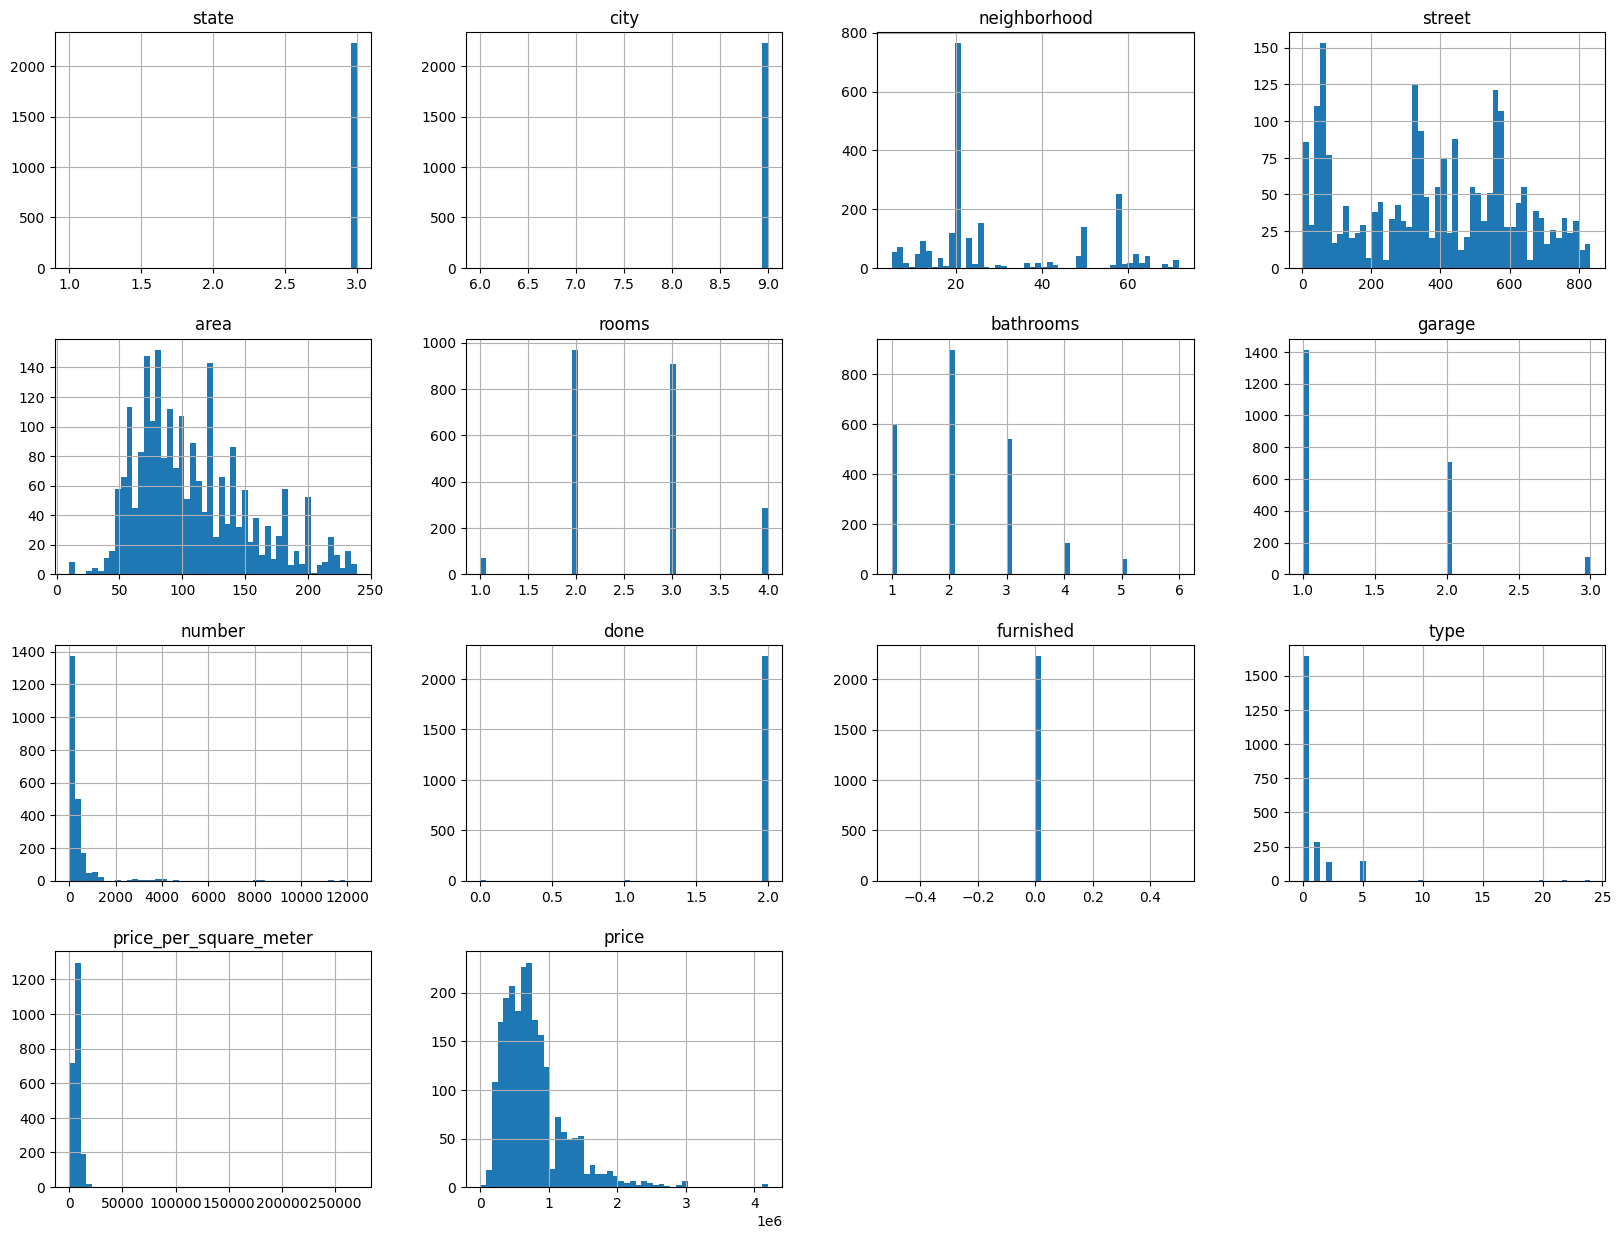

In [161]:
train_data.hist(bins=50, figsize=(20,15))

<Axes: >

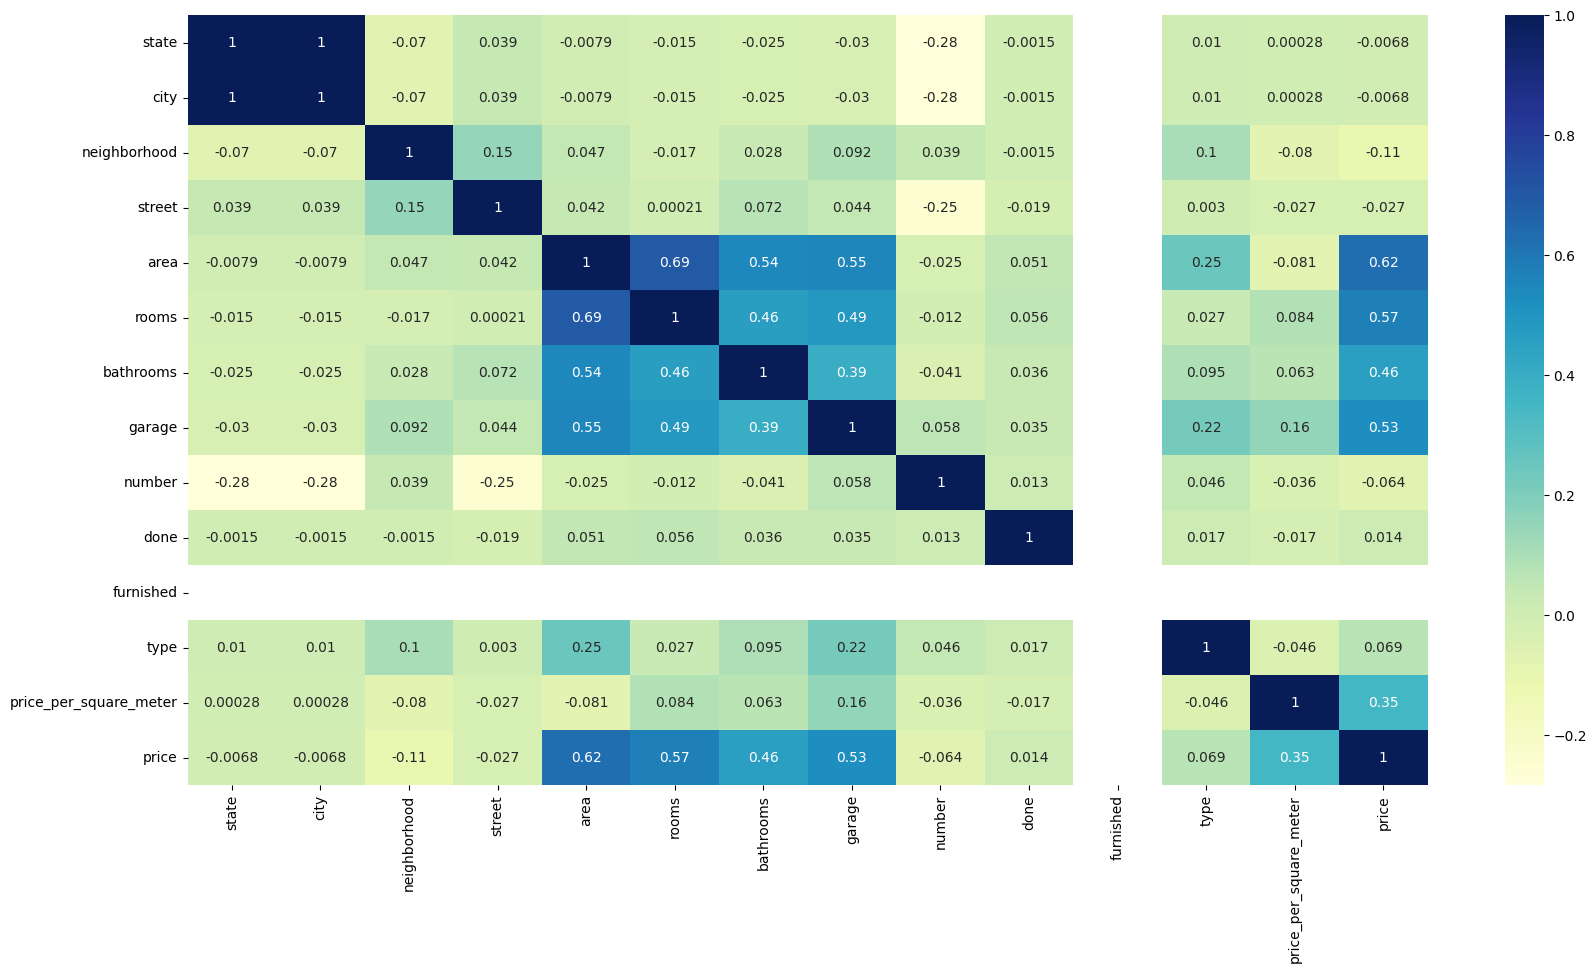

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [165]:
import numpy as np

train_data["number"] = np.log(train_data["number"]+1)
train_data["neighborhood"] = np.log(train_data["neighborhood"]+1)
train_data["price_per_square_meter"] = np.log(train_data["price_per_square_meter"]+1)

array([[<Axes: title={'center': 'state'}>,
        <Axes: title={'center': 'city'}>,
        <Axes: title={'center': 'neighborhood'}>,
        <Axes: title={'center': 'street'}>],
       [<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'garage'}>],
       [<Axes: title={'center': 'number'}>,
        <Axes: title={'center': 'done'}>,
        <Axes: title={'center': 'furnished'}>,
        <Axes: title={'center': 'type'}>],
       [<Axes: title={'center': 'price_per_square_meter'}>,
        <Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

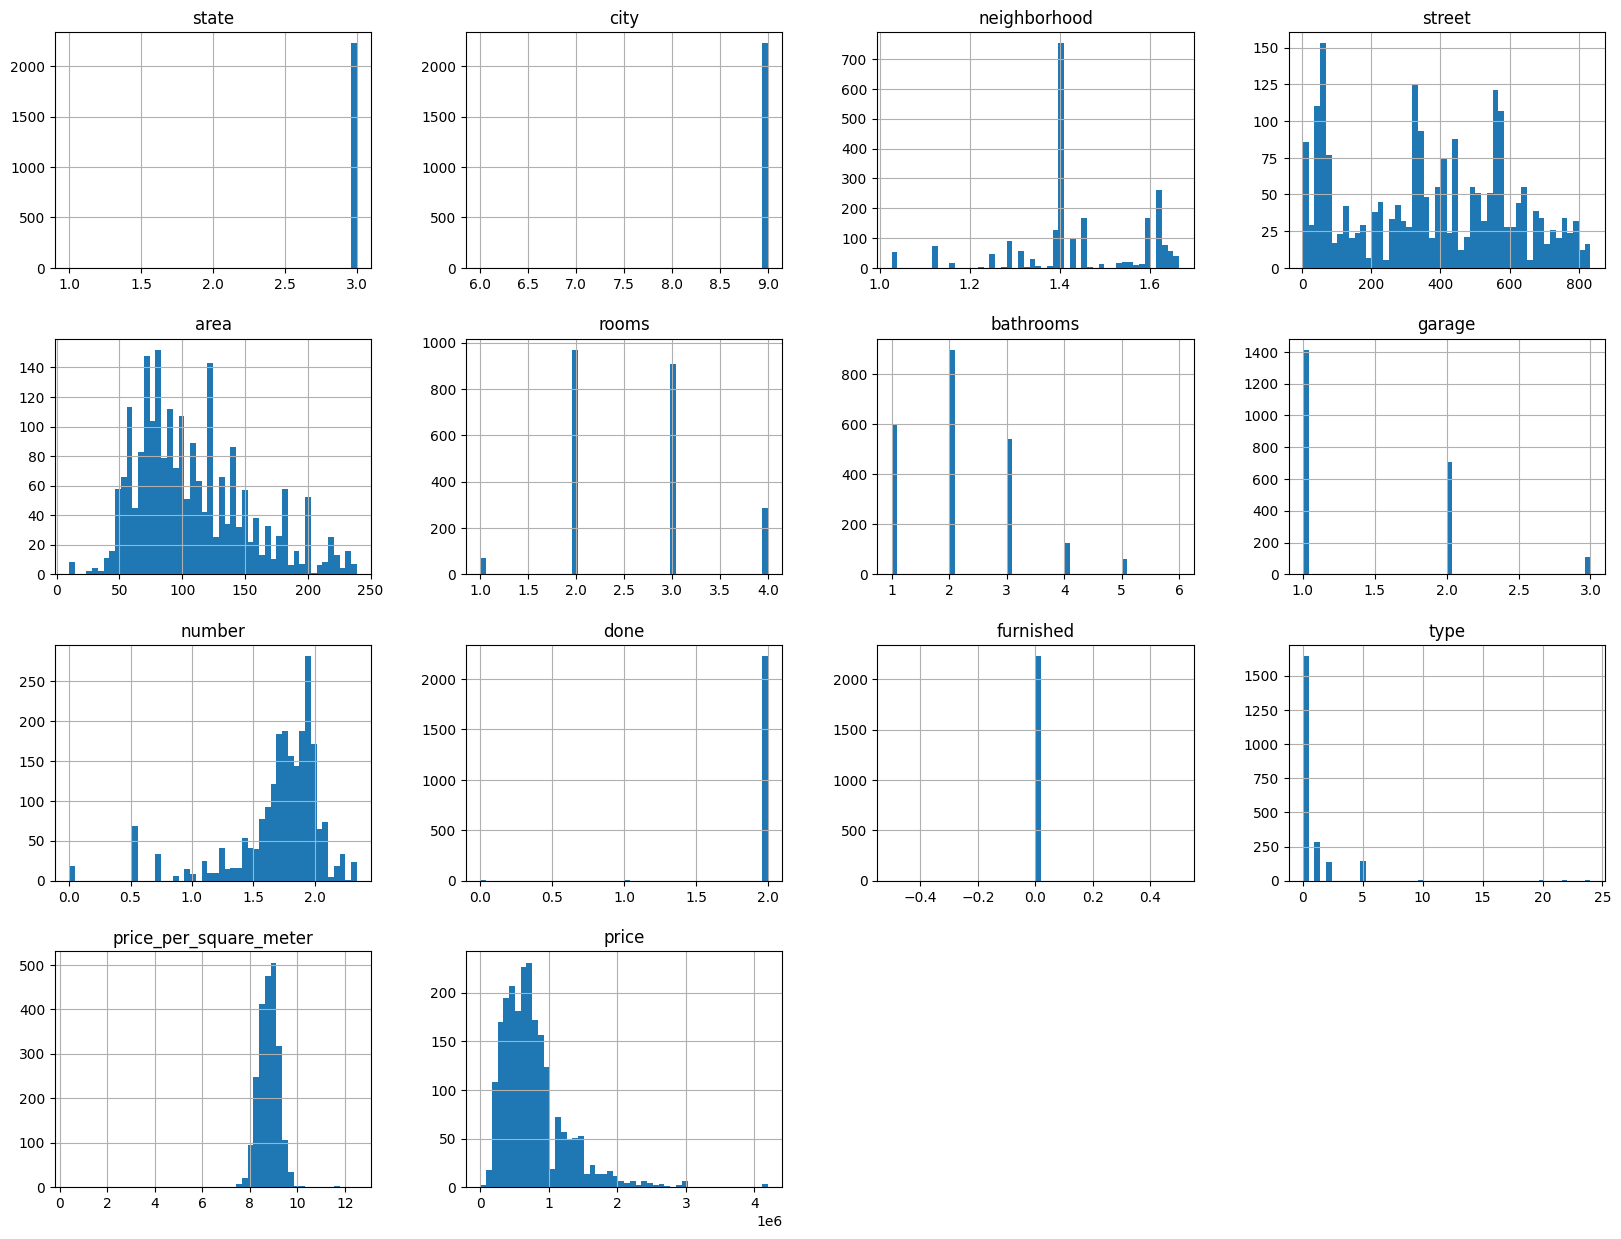

In [166]:
train_data.hist(bins=50, figsize=(20,15))

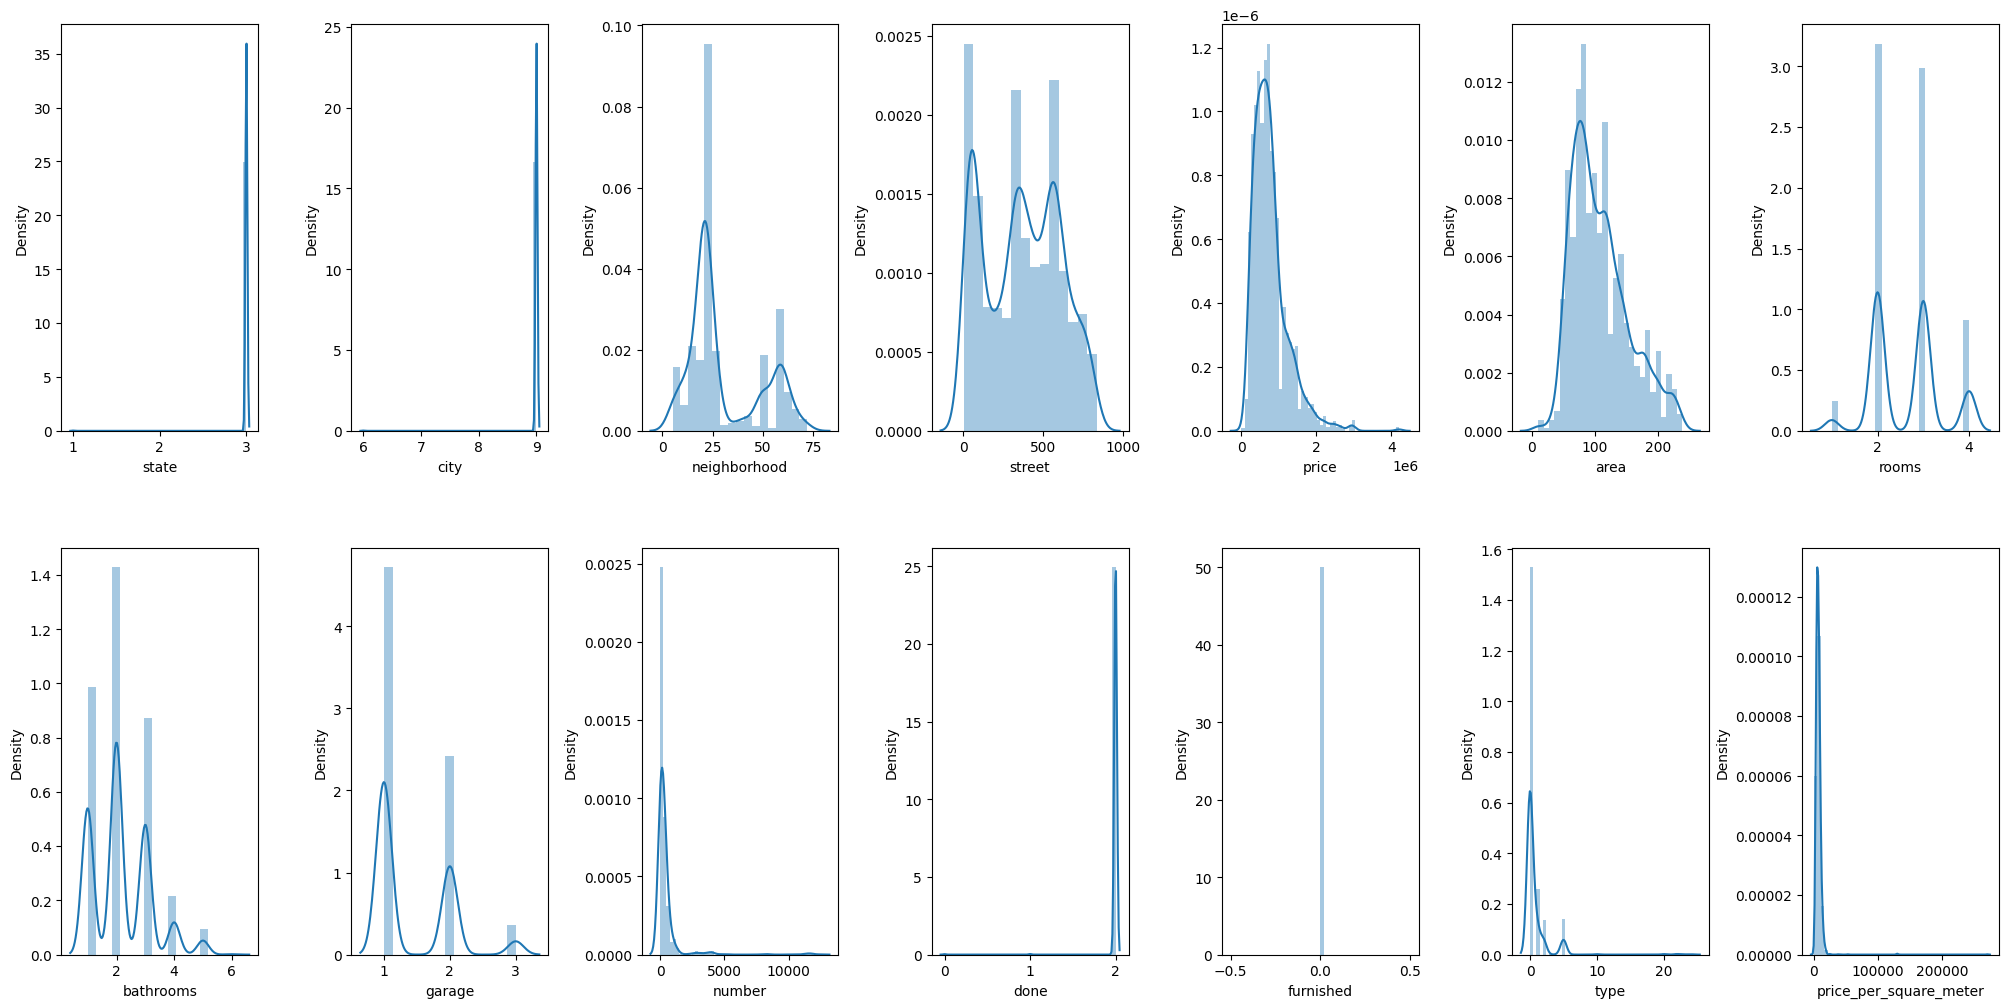

In [244]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    if pd.api.types.is_numeric_dtype(v):
        sns.distplot(v, ax=axs[index])
        index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

             state         city  neighborhood       street         price  \
count  2789.000000  2789.000000   2789.000000  2789.000000  2.789000e+03   
mean      2.998566     8.997849     30.027967   367.972750  7.680080e+05   
std       0.053548     0.080322     17.861272   233.344689  4.690099e+05   
min       1.000000     6.000000      5.000000     2.000000  4.000000e+01   
25%       3.000000     9.000000     21.000000   134.000000  4.500000e+05   
50%       3.000000     9.000000     21.000000   361.000000  6.800000e+05   
75%       3.000000     9.000000     50.000000   562.000000  9.500000e+05   
max       3.000000     9.000000     72.000000   834.000000  4.200000e+06   

              area        rooms    bathrooms       garage       number  \
count  2789.000000  2789.000000  2789.000000  2789.000000   2789.00000   
mean    108.560416     2.622445     2.171029     1.419147    433.10147   
std      45.131472     0.742595     0.987624     0.583433   1211.67194   
min      10.000000 

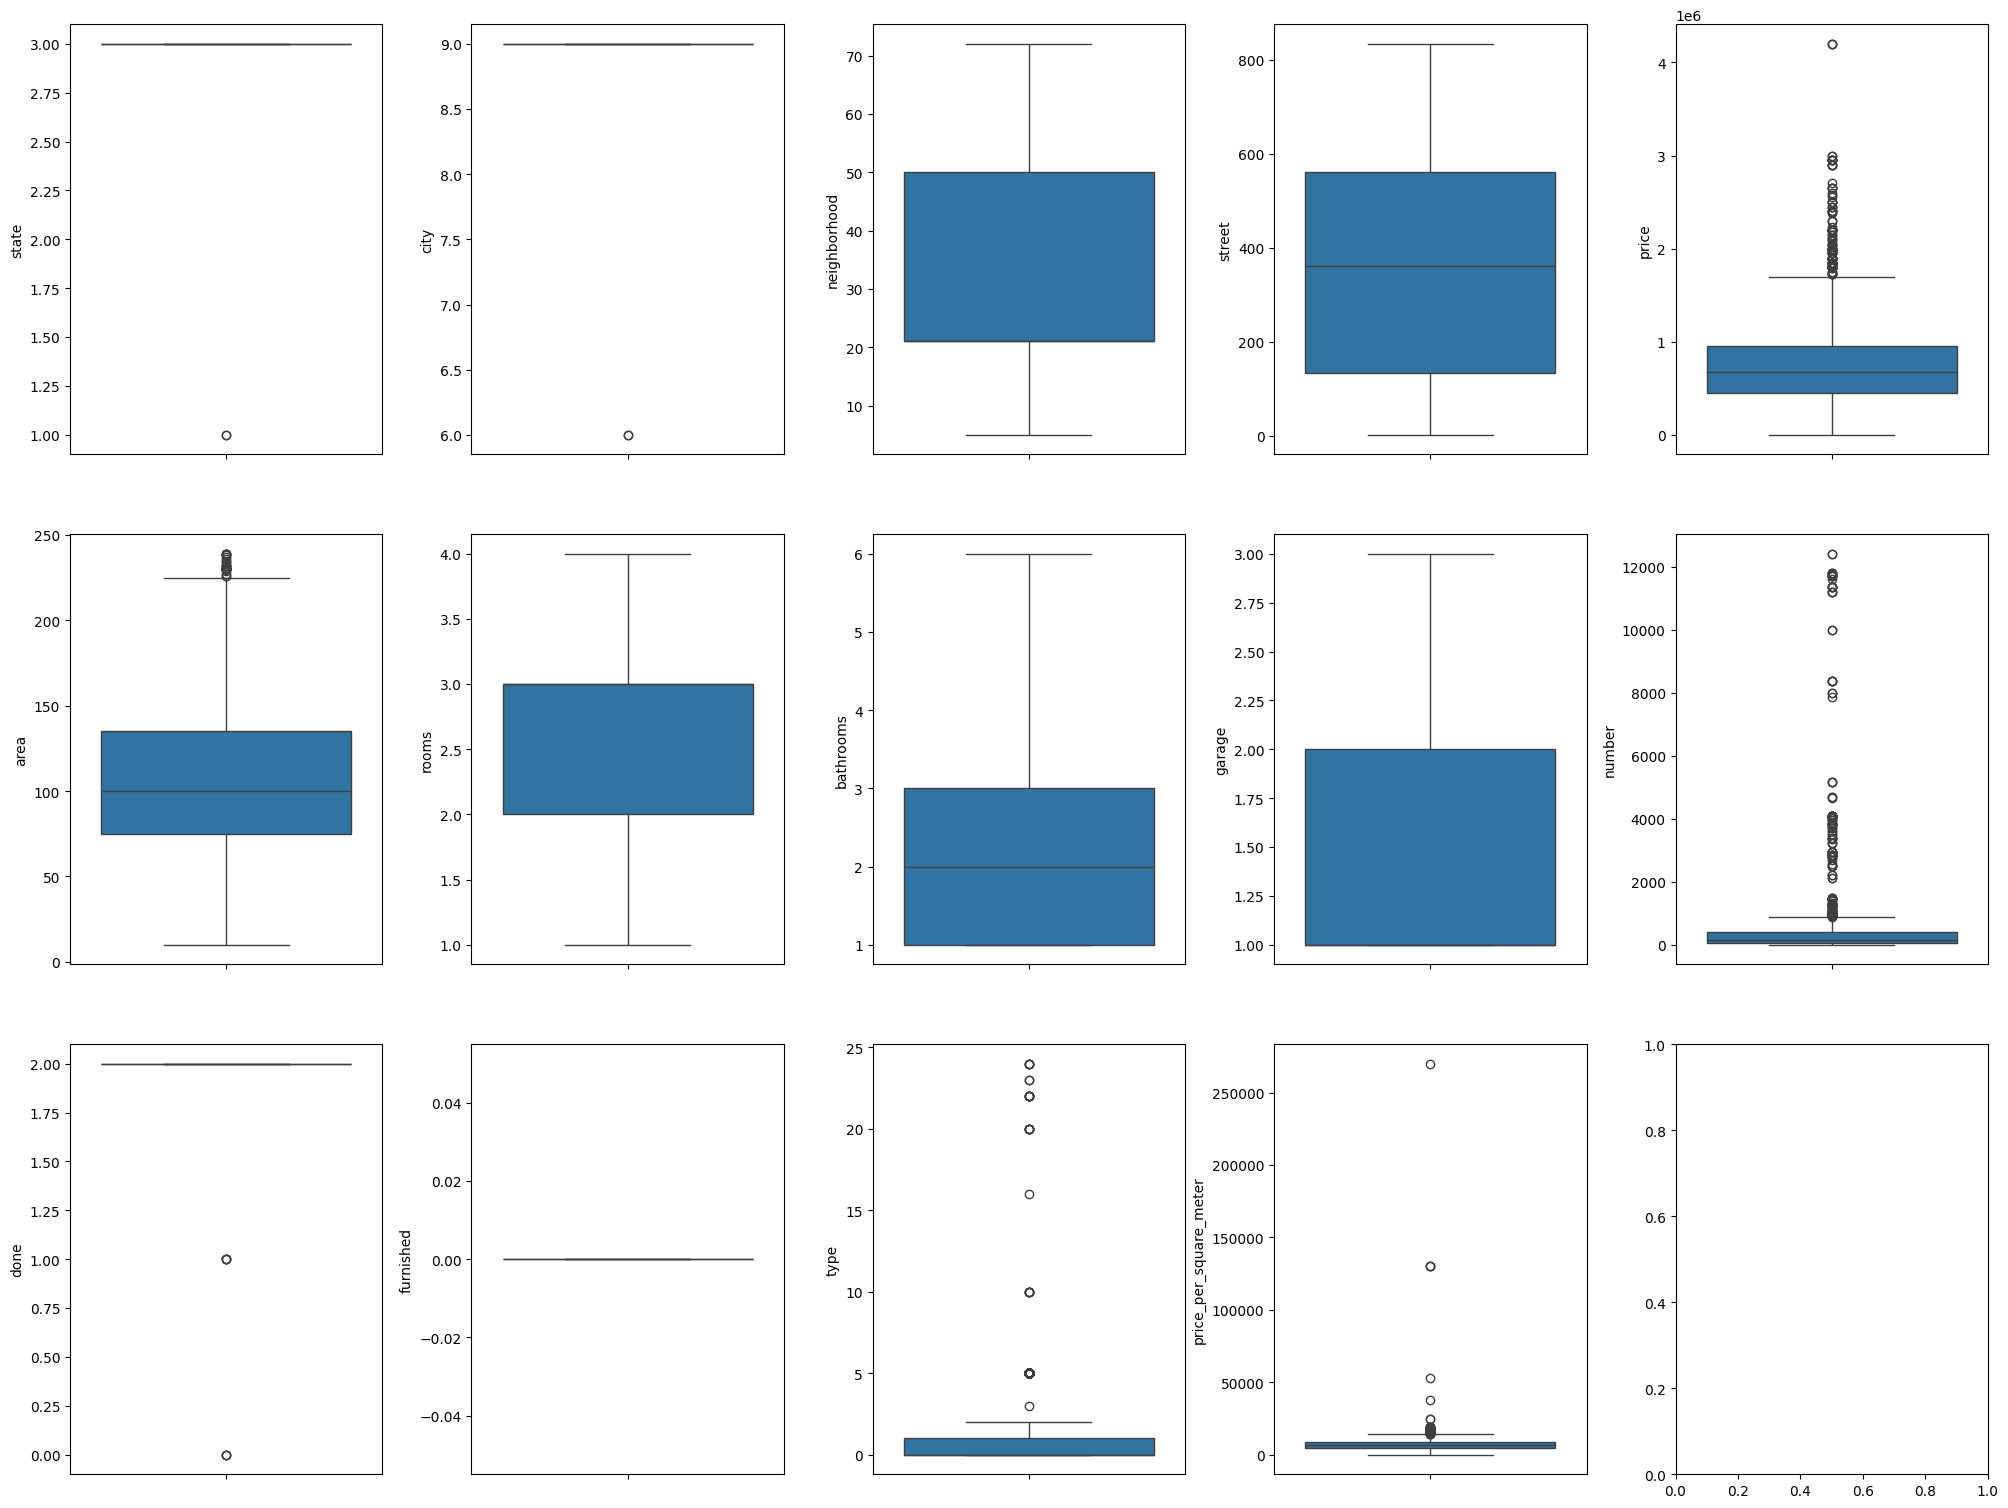

In [245]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 15))  # Ajustado para 15 subplots
index = 0
axs = axs.flatten()
for k, v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
print(data.describe())

<Axes: xlabel='street', ylabel='price'>

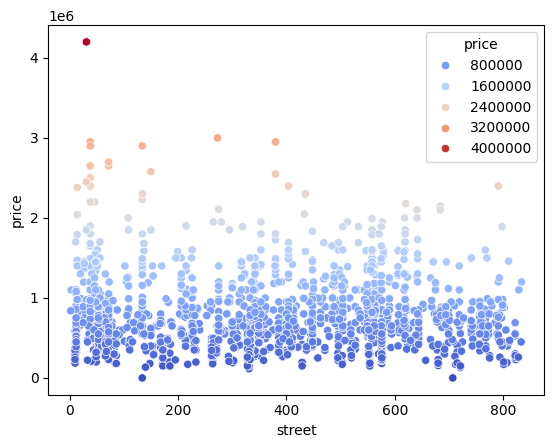

In [167]:

sns.scatterplot(x='street', y='price', data=train_data, hue = "price", palette="coolwarm")

<Axes: xlabel='garage', ylabel='price'>

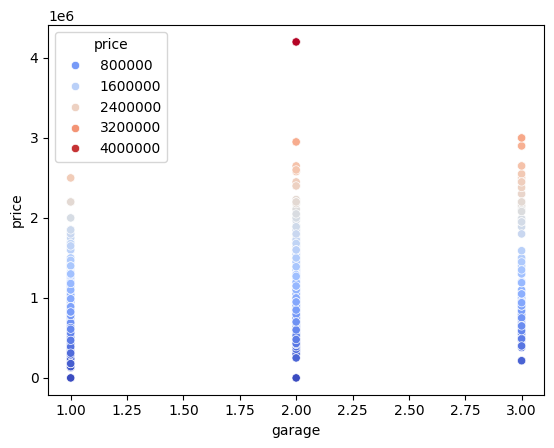

In [27]:
sns.scatterplot(x='garage', y='price', data=train_data, hue = "price", palette="coolwarm")


<Axes: xlabel='rooms', ylabel='price'>

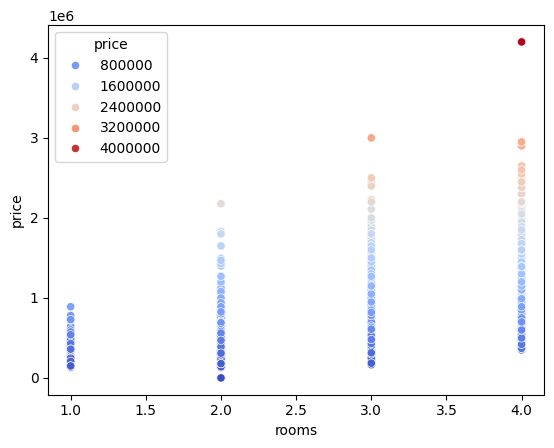

In [28]:
sns.scatterplot(x='rooms', y='price', data=train_data, hue = "price", palette="coolwarm")


<Axes: xlabel='area', ylabel='price'>

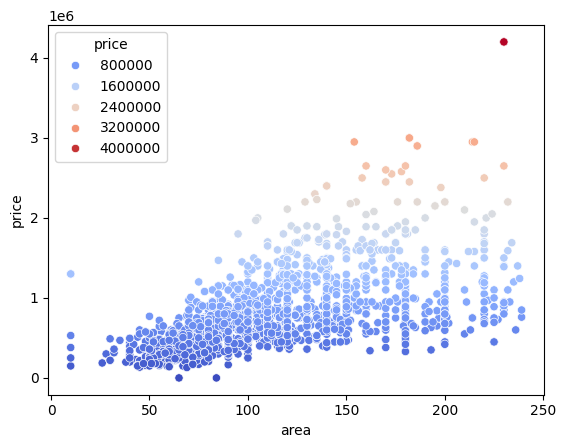

In [29]:
sns.scatterplot(x='area', y='price', data=train_data, hue = "price", palette="coolwarm")


<Axes: xlabel='bathrooms', ylabel='price'>

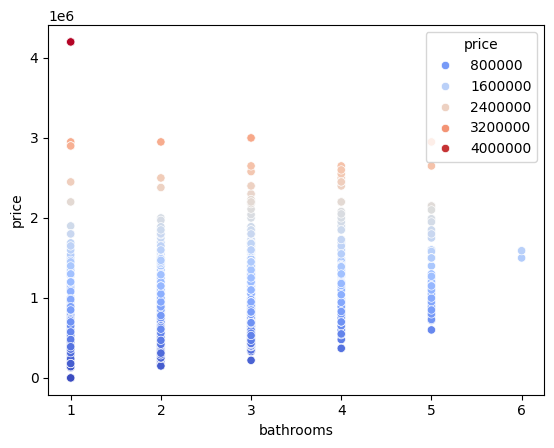

In [30]:
sns.scatterplot(x='bathrooms', y='price', data=train_data, hue = "price", palette="coolwarm")


<Axes: xlabel='price_per_square_meter', ylabel='price'>

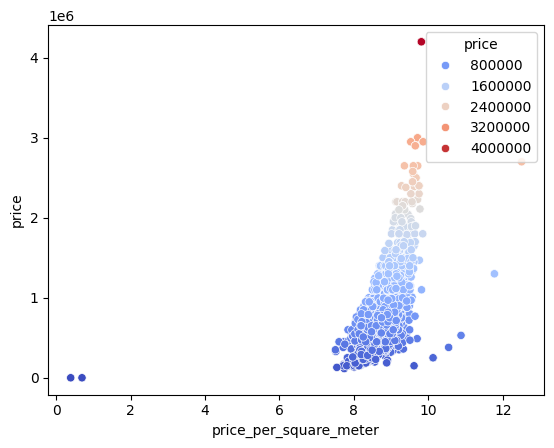

In [170]:
sns.scatterplot(x='price_per_square_meter', y='price', data=train_data, hue = "price", palette="coolwarm")


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X_train = train_data.drop('price', axis=1)
#X_train = X_train.drop('price_per_square_meter', axis=1)
#X_test = X_test.drop('price_per_square_meter', axis=1)
y_train = train_data['price']

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

X_train_scaled = StandardScaler().fit_transform(X_train)
y_train_scaled = StandardScaler().fit_transform(y_train.values.reshape(-1,1))

reg = LinearRegression()

reg.fit(X_train_scaled, y_train_scaled)


LinearRegression()

In [215]:
reg.score(X_test, y_test)

      state  city  neighborhood  street   area  rooms  bathrooms  garage  \
2480      3     9            13     168  140.0    3.0        3.0     1.0   
3796      3     9            62      46  200.0    3.0        3.0     3.0   
1944      3     9            26      72  124.0    4.0        2.0     1.0   
2368      3     9            13     303   45.0    2.0        1.0     3.0   
418       3     9            21     215   95.0    3.0        2.0     2.0   
...     ...   ...           ...     ...    ...    ...        ...     ...   
890       3     9            21      56  110.0    2.0        2.0     1.0   
4507      3     9            19     185   44.0    1.0        1.0     1.0   
907       3     9            21     789  184.0    3.0        1.0     2.0   
4706      3     9            26      45   90.0    2.0        2.0     2.0   
3405      3     9            21     134  104.0    3.0        2.0     2.0   

       number  done  furnished  type  
2480    360.0     2          0     5  
3796    8

-2.468220784147511

In [216]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=0)

forest.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=0)

Not good result scaling data, not scale for randomforest in this dataset

In [217]:
forest.score(X_test, y_test)

0.4252588769449802

In [224]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
            'bootstrap': [False],
            'max_depth': [None],
            'max_features': [1],
            'min_samples_split': [2],
            'n_estimators': [500]}
            

grid = GridSearchCV(forest, param_grid, cv=5, 
                            scoring='neg_mean_squared_error',
                            return_train_score=True)

grid_search = grid.fit(X_train, y_train)

In [225]:
best_forest = grid_search.best_estimator_

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

print(f'Score: {best_forest.score(X_test, y_test)}')
for i in range(len(X_test)):
    print(f'prediction = {np.exp(best_forest.predict([X_test.iloc[i]]))[0]} <--> real = {y_test.iloc[i]}')

Price per square meter --> Feature Engeneering

In [157]:
data['price_per_square_meter'] = data['price'] / data['area']

1       7192.307692
2       8919.642857
3       6037.735849
4       4166.666667
6       8000.000000
           ...     
4732    4264.957265
4733    2816.901408
4734    4727.272727
4737    5987.261146
4738    2500.000000
Name: price_per_square_meter, Length: 2789, dtype: float64


Log transformation:

import numpy as np

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

Após predição:

predictions = np.exp(model.predict(X_test))


In [ ]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

Separar os Dados por Faixas de Preço:

Treine modelos separados para diferentes faixas de preço. Por exemplo:

Imóveis de baixo valor (até R$500.000).
Imóveis de médio valor (R$500.000 a R$1.000.000).
Imóveis de alto valor (acima de R$1.000.000).

low_price_model.fit(low_price_data)
high_price_model.fit(high_price_data)

In [228]:
from sklearn.model_selection import train_test_split


# Separar os dados por faixas de preço

low_price_data = train_data[train_data['price'] <= 500000]
medium_price_data = train_data[(train_data['price'] > 500000) & (train_data['price'] <= 1000000)]
high_price_data = train_data[train_data['price'] > 1000000]

# Separar as features e os targets

X_low = low_price_data.drop('price', axis=1)
X_low = X_low.drop('price_per_square_meter', axis=1)
y_low = low_price_data['price']
X_medium = medium_price_data.drop('price', axis=1)
X_medium = X_medium.drop('price_per_square_meter', axis=1)
y_medium = medium_price_data['price']
X_high = high_price_data.drop('price', axis=1)
X_high = X_high.drop('price_per_square_meter', axis=1)
y_high = high_price_data['price']


# Dividir os dados de baixo valor

X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low, y_low, test_size=0.25, random_state=42)

# Dividir os dados de médio valor

X_medium_train, X_medium_test, y_medium_train, y_medium_test = train_test_split(X_medium, y_medium, test_size=0.25, random_state=42)

# Dividir os dados de alto valor

X_high_train, X_high_test, y_high_train, y_high_test = train_test_split(X_high, y_high, test_size=0.25, random_state=42)


In [239]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
            'bootstrap': [False],
            'max_depth': [None, 2, 4, 6],
            'max_features': [1, 2, 3, 4],
            'min_samples_split': [2, 4, 6],
            'n_estimators': [10, 20 ,30, 100]}
            

grid = GridSearchCV(forest, param_grid, cv=5, 
                            scoring='neg_mean_squared_error',
                            return_train_score=True)

grid_search = grid.fit(X_high_train, y_high_train)

In [240]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_split': 2,
 'n_estimators': 20}

In [241]:
best_forest = grid_search.best_estimator_

In [242]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

print(f'Score: {best_forest.score(X_high_test, y_high_test)}')
for i in range(len(X_high_test)):
    print(f'prediction = {best_forest.predict([X_high_test.iloc[i]])[0]} <--> real = {y_high_test.iloc[i]}')

Score: 0.767854807633401
prediction = 1175125.0 <--> real = 1155000.0
prediction = 1300000.0 <--> real = 1300000.0
prediction = 2400000.0 <--> real = 2400000.0
prediction = 1250000.0 <--> real = 1250000.0
prediction = 1905217.5 <--> real = 1390000.0
prediction = 1232500.0 <--> real = 1150000.0
prediction = 2450000.0 <--> real = 2450000.0
prediction = 1498395.0 <--> real = 1540000.0
prediction = 1475000.0 <--> real = 1600000.0
prediction = 1340500.0 <--> real = 1450000.0
prediction = 1277500.0 <--> real = 1250000.0
prediction = 1297495.0 <--> real = 1590000.0
prediction = 1650000.0 <--> real = 1650000.0
prediction = 1275700.0 <--> real = 1320000.0
prediction = 1157000.0 <--> real = 1157000.0
prediction = 1800000.0 <--> real = 1800000.0
prediction = 1900000.0 <--> real = 1900000.0
prediction = 1300000.0 <--> real = 1300000.0
prediction = 1332875.5 <--> real = 1490000.0
prediction = 1244850.0 <--> real = 1080000.0
prediction = 1502250.0 <--> real = 1700000.0
prediction = 1180000.0 <--> re

In [243]:
import joblib

joblib.dump(best_forest, 'best_forest_high_0.76.pkl')

['best_forest_high_0.76.pkl']